<b><font size=5><center>Выпускной проект.<br> Анализ товарного ассортимента интернет-магазина товаров для дома и быта «Пока все ещё тут».</center></font></b>

Описание проекта.
Для анализа дана выгрузка ассортимента интернет-магазина товаров для дома и быта "Пока все тут".
Менеджеру проекта, который отвечает за актуальность товароного ассортимента необходимо:  
- определить какие товары являются основными, какие дополнительными;  
- предложить варианты по доп. товарам для увеличения продаж;  
- оптимизация закупок товара.   


Описание данных:  
- `date` — дата заказа;
- `customer_id` — идентификатор покупателя;
- `order_id` — идентификатор заказа;
- `product` — наименование товара;
- `quantity` — количество товара в заказе;
- `price` — цена товара.

## Загрузка данных 

In [1]:
#импорт библиотек 
import pandas as pd
import numpy as np
from IPython import display

import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

from pymystem3 import Mystem
from collections import Counter

from scipy import stats as st

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/ecommerce_dataset.csv')

In [3]:
#предпросмотр 
df.head()

,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         6737 non-null   int64  
 1   customer_id  6737 non-null   object 
 2   order_id     6737 non-null   int64  
 3   product      6737 non-null   object 
 4   quantity     6737 non-null   int64  
 5   price        6737 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 315.9+ KB


Данные для анализа состоят из 6737 строк и 6 столбцов. При предварительном просторе определила необходимость изменения типа данных, приведения наименования продуктов к нижнему регистру. 

## Подготовка данных

In [5]:
#преобразование типа данных 
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d%H')

In [6]:
#просмотр пропусков
df.isna().sum()

date           0
customer_id    0
order_id       0
product        0
quantity       0
price          0
dtype: int64

In [7]:
#просмотр дубликатов
df.duplicated().sum()

0

In [8]:
#приведение к нижнему регистру
df['product'] = df['product'].str.lower()

In [9]:
df.describe()

,order_id,quantity,price
count,6737.000000,6737.000000,6737.000000
mean,43128.948345,2.501559,462.028499
std,27899.414662,15.266478,871.296064
min,12624.000000,1.000000,9.000000
25%,14827.000000,1.000000,101.000000
50%,68503.000000,1.000000,135.000000
75%,70504.000000,1.000000,398.000000
max,73164.000000,1000.000000,14917.000000


In [10]:
df['date'].describe()

count                    6737
unique                   2606
top       2019-04-27 16:00:00
freq                       51
first     2018-10-01 00:00:00
last      2019-10-31 16:00:00
Name: date, dtype: object

In [11]:
print('Всего по идентификатору покупателей:',len(df['customer_id'].unique()))
print('Всего по идентификатору заказа:',len(df['order_id'].unique()))
print('Всего товаров:',len(df['product'].unique()))

Всего по идентификатору покупателей: 2451
Всего по идентификатору заказа: 2784
Всего товаров: 2341


In [12]:
df['month'] = df['date'].dt.month

In [13]:
df['year'] = df['date'].dt.year

In [14]:
df.head()

,date,customer_id,order_id,product,quantity,price,month,year
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,10,2018
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.0,10,2018
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0,10,2018
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0,10,2018
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0,10,2018


In [15]:
#информация о данных в столбце quantity
df['quantity'].describe()

count    6737.000000
mean        2.501559
std        15.266478
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max      1000.000000
Name: quantity, dtype: float64

Видим большой разброс ( стандартное отклонение в 15 шт.), выбросы в 1000 шт. Среднее отличается от мединанного значения. 
Смротрим более подробно, чтобы принять решение. 

In [16]:
df['quantity'].sort_values(ascending = False).head(20)

5456    1000
5071     334
3961     300
1158     200
568      170
211      150
212      150
267      150
2431     150
266      150
586      140
6535     100
6707     100
1103     100
1555     100
13        96
6367      80
4082      70
6567      65
160       64
Name: quantity, dtype: int64

In [17]:
df.query('quantity == 1000') 

,date,customer_id,order_id,product,quantity,price,month,year
5456,2019-06-18 15:00:00,312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6,71743,"вантуз с деревянной ручкой d14 см красный, bur...",1000,675.0,6,2019


In [18]:
#информация о товарах 
df.query('quantity >= 70')['product'].unique()

array(['крючок одежный 2-х рожковый серый металлик с полимерным покрытием *тонар*, 1110027',
       'крепеж для пружины дверной, 1107055',
       'пружина дверная 240 мм оцинкованная (д-19 мм) без крепления, 1107014',
       'муляж яблоко 9 см красное',
       'щетка для посуды *оля*, мультипласт 1807010',
       'ручка-скоба рс-100 белая *трибатрон*, 1108035',
       'щетка для мытья посуды колибри м5202 большая',
       'плечики пластмассовые размер 52 - 54 тула 1205158',
       'насадка на валик вмм-200/60 белый искусственный мех, 0703011',
       'вешалки мягкие для деликатных вещей 3 шт шоколад',
       'вантуз с деревянной ручкой d14 см красный, burstenmann, 0522/0000',
       'универсальный нож webber из нержавеющей стали русские мотивы 12,7 см с деревянной ручкой ве-2252d',
       'крепеж для пружины дверной оцинкованный, 1107054',
       'шпингалет 80 мм белый с пружиной, 1102188'], dtype=object)

In [19]:
df.query('quantity >= 70').pivot_table(index=['customer_id','order_id', 'month', 'quantity', 'product'],  aggfunc= {'price': np.sum})

,,,,,price
customer_id,order_id,month,quantity,product,
018fb729-3525-4314-8e4d-1982b1062f9f,73110,10,100,"шпингалет 80 мм белый с пружиной, 1102188",44.0
0948b0c2-990b-4a11-b835-69ac4714b21d,68486,10,96,"крючок одежный 2-х рожковый серый металлик с полимерным покрытием *тонар*, 1110027",38.0
0c5aaa88-e346-4f87-8f7a-ad8cbc04e965,68831,11,140,муляж яблоко 9 см красное,59.0
146cd9bf-a95c-4afb-915b-5f6684b17444,71668,6,334,вешалки мягкие для деликатных вещей 3 шт шоколад,148.0
312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6,71743,6,1000,"вантуз с деревянной ручкой d14 см красный, burstenmann, 0522/0000",675.0
5d189e88-d4d6-4eac-ab43-fa65a3c4d106,71478,5,300,муляж яблоко 9 см красное,51.0
685d3d84-aebb-485b-8e59-344b3df8b3d3,70841,3,150,плечики пластмассовые размер 52 - 54 тула 1205158,20.0
7d255526-fcc2-4f79-b28a-217d7d2373a8,69206,12,100,"щетка для посуды *оля*, мультипласт 1807010",26.0
8eabcaca-e8c8-4eee-9079-4ff5f612273a,69893,1,100,щетка для мытья посуды колибри м5202 большая,34.0


Рассмотрев покупки с количеством более 70 товаров, предполагаю, что это категория покупатилей с пометкой "оптовик". К такому выводу пришла потому, что рассмотрев заказы по product и по customer_id увидела, это разные заказчики, а товар для личного пользования, приобретен в слишком большом количестве.  Для разграничения будет введен новый столбец с категорией покупателя. Не исключила их выгрузки потому, что планирую отдельно по категориям предложить врианты увеличения продаж при помощи доп. товаров или скидочной ститемы. 

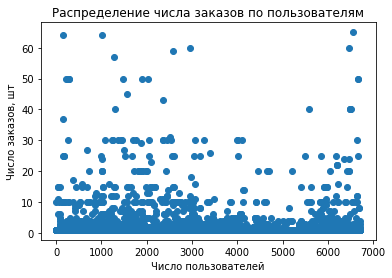

In [20]:
df_retail = df.query('quantity < 70')

x_values = pd.Series(range(0, len(df_retail)))

plt.scatter(x_values, df_retail['quantity']) 

plt.title('Распределение числа заказов по пользователям')
plt.xlabel('Число пользователей')
plt.ylabel('Число заказов, шт')
plt.show()

Исключив оптовых покупателей, видим, что выбросы есть, но больше всего покупок до 10 ед. товара. 

In [21]:
#функция для категоризации покупателей, где опт - оптовые продажи, розница - розничные продажи 
def category_of_buyers(row):
    if row['quantity'] >= 70:
        return 'опт'
    elif row['quantity'] < 70:
        return 'розница'
    

df['category_of_buyers'] = df.apply(category_of_buyers, axis = 1) 


Работа с товарами. 

In [22]:
#загрузка библиотеки
from pymystem3 import Mystem
m = Mystem()
#делаем список 
product_list = df['product'].unique()

# каждую строчку лемматизируем 
lemmas = []
for i in product_list:
    result = ''.join(m.lemmatize(i)).strip()
    lemmas.append(result)
lemmas

['комнатный растение в горшок алый вера, d12, h30',
 'комнатный растение в горшок кофе арабика, d12, h25',
 'радермахер d-12 см h-20 см',
 'хризолидокарпус лутесценс d-9 см',
 'циперус зумул d-12 см h-25 см',
 'шеффлер лузеан d-9 см',
 'юкка нитчатый d-12 см h-25-35 см',
 'настенный сушилка для белье gimi brio super 100',
 'таз пластмассовый 21,0 л круглый "водолей" с614, 1404056',
 'чехол для гладильный доска colombo persia beige 130х50 см из хлопок 5379',
 'вешалка для брюки металлический с резиновый покрытие 26 см цвет: синий, attribute, ahs331',
 'сушилка для белье потолочный zalger lift basic 1520 200 см, 10 м',
 'чехол eurogold clean basic хлопок для доска 120х38-120х42 см c42',
 'крючок одежный 2-х рожковый серый металлик с полимерный покрытие *тонар*, 1110027',
 'корзина мягкий пластиковый 17 л, м-пластика, m2880',
 'мини-сковорода marmiton "сердце" с антипригарный покрытие 12 см, lg17085',
 'сковорода алюминиевый с антипригарный покрытие marble alpenkok d = 26 см ak-0039a/26n'

In [23]:
len(lemmas)

2341

In [24]:
# создание списков для распределения по категориям 
plants =  ['рассада', 'растение', 'аквилегия', 'алиссум', 'анемон', 'антуриум', 'арбуз', 'астра', 'бадан', 'бакоп', 'барвинок', 'бегония',
         'бузульник', 'вербейник', 'вербена', 'виола','гайлардий','георгин', 'гипсофил', 'гортензия', 'девичий', 'дендробиум', 
         'дыня', 'ель', 'календула', 'калибрахоа', 'камнеломка', 'кипарисовик', 'клен', 'клубника', 'колокольчик', 'кореопсис',
         'котовник', 'лапчатка', 'лен', 'лилейник', 'лобелия', 'лаванда', 'многолетний', 'монарда', 'настурция', 'нивянник', 
         'осина','папоротник', 'пеларгония', 'петуния', 'пикник', 'пиретрум', 'платикодон',  'ранункулус', 'роза', 'рудбекия', 
         'седум', 'солидаго', 'томат', 'тюльпан', 'уличный', 'физостегия', 'флокс', 'фуксия', 'хоста', 'хризантема', 'цинния', 
         'черенок', 'энотера', 'эхинацея','юкка', 'ясколка', 'радермахера', 'хризолидокарпус', 'd-', 'd-5', 'd-7', 'd-9', 
         'D10', 'd-10', 'd-11', 'D12', 'D12,', 'd12', 'd-12', 'd-13', 'd-14', 'd-15', 'космея',
         'd-17', 'd-18', 'd-19', 'd-20', 'd-21', 'D23', 'd-23', 'кориандр', 'укроп', 'базилик', 'салат', 'петрушка', 'огурец', 
        'морковь', 'вигна','эшшольция', 'шалфей', 'любисток', 'цинерария', 'годеция', 'примула', 'вероника', 'пуансеттия',
        'горох', 'земляника', 'капуста', 'змееголовник', 'гайлардия', 'валериана', 'незабудка', 'тимьян', 'маттиола', 
        'лаватера', 'смолевка', 'хризолидокарпус']

dacha = ['автополив', 'бензин', 'бак', 'веник', 'веревка', 'гвоздик', 'зола', 'кассета', 'кашпо', 'корыто', 'мусор', 
         'мусорный', 'настурция', 'пикник', 'пьезозажигалка', 'садовый', 'сумка-тележка','тележка',
         'уличный', 'урна', 'урна-пепельница', 'хозяйственный', 'шнур', 'шпагат', 'щетка-сметка', 'сумка']

house = [ 'ванна', 'ванная', 'ванный', 'вантуз', 'ваза', 'ведро', 'весы', 'вешалка', 'вешалка-перекладина', 
         'вешалка-плечики', 'вешалка-стойка', 'вешалка-сушилка', 'вещь', 'гладильный', 'глажение', 'засор', 
         'зубной', 'известковый', 'искусственный', 'искуственный', 'калла', 'ключница', 'ковер', 'коврик', 'ковш', 
         'комнатный', 'кондиционер', 'корзина', 'коробка', 'кофр', 'крючок', 'комод','лавр', 'лоток', 'мыло', 'мыло-скраб', 
         'муляж', 'наволочка', 'наматрацник', 'наматрицник-чехол', 'наматрасник', 'насадка', 'насадка-моп', 'одеяло', 
         'окномойка', 'отбеливатель', 'перчатка', 'плед', 'плечики', 'подголовник', 'пододеяльник', 'подрукавник', 
         'подушка', 'покрывало', 'пол', 'полимербыт', 'полировка', 'полотенце', 'постельный', 'прищепок', 'простыня', 
         'пыль', 'пятно', 'радиаторный', 'ролик', 'салфетка', 'сантехника', 'светильник', 'обувница', 'совок', 'стиральный', 
         'стирка', 'сушилка', 'таз', 'ткань', 'тряпка', 'тряпкодержатель', 'туалет', 'туалетный', 'увлажнять', 'унитаз', 
         'унитазный', 'утюг', 'фен', 'фоторамка','халат', 'хранение', 'цикламен,', 'чехол', 'швабра', 'пуф', 
         'щетка', 'щетка-утюжок', 'шило', 'штора', 'этажерка', 'гладильная', 'ёрш', 'вешалки', 'перчатки', 'набор', 
         'декоративная', 'сиденье', 'рукав', 'дозатор', 'пена', 'штанга', 'покрытие', 'ящик', 'паста', 'ковёр', 'крем', 
         'искусственная', 'мешок', 'мыльница', 'кольца', 'сметка', 'средство', 'отжим', 'решетка', 'маска', 'сетка']

kitchen = ['антижир', 'банка', 'бидон', 'блюдо', 'блюдце', 'бокал', 'бульонница', 'бутылка', 'бутылочный', 'венчик',
           'вилка', 'выпечка', 'герметичный', 'губка', 'измельчитель', 'картофелемялка', 'кастрюля', 'кекс',
           'кипятильник', 'кондитерский', 'кружка', 'крышка', 'кухонный', 'лопатка', 'ложка', 'мантоварка',
           'мантоварка-пароварка', 'миксер', 'мини-сковорода', 'миска', 'мука', 'нож', 'ножеточка', 'овощеварка',
           'овощечистка', 'овсянница', 'орехоколка', 'отделитель', 'плита', 'половник', 'посуда', 'посудомоечный',
           'пресс', 'продукт', 'противень', 'разделочный', 'рыбочистка', 'салатник', 'салфетница', 'сахарница', 'свч',
           'сито', 'скалка', 'скатерть', 'сковорода', 'соковарка', 'соковыжималка', 'сотейник', 'стакан', 'столовый',
           'тарелка', 'терка', 'термокружок', 'термос', 'термостакан', 'толкушка', 'тортница', 'фужер', 'хлебница',
           'чайник', 'чайный', 'электроштопор', 'яйцо', 'котел', 'кувшин', 'салфеток', 'пакет', 'разделочная', 'кисточка',
           'посуды', 'форма', 'салфетки', 'емкость']

accessories = ['болт', 'вентиляционный', 'инструмент', 'карниз',  'крепеж', 'лестница-стремянка', 'линейка',
             'мебельный', 'напильник', 'петля', 'петля-стрела', 'подставка', 'скребок', 'полк', 'полка', 'пробка', 
             'сварка', 'сверло', 'сверло-фреза,', 'свереть', 'стеллаж', 'стремянка', 'стремянка-табурет', 'строительный',
             'уголок', 'угольник', 'угольник,', 'фиксатор-шар', 'форточный', 'шпингалет', 'штангенциркуль', 'основание', 
             'стяжки', 'стремянки', 'ручка-скоба', 'фал']

In [25]:
# функция для распределения по категориям
def classify_product(lemmas):
    for item in plants:
        if item in lemmas:
            return 'растения'
    for item in dacha:
        if item in lemmas:
            return 'товары для дачи'
    for item in house:
        if item in lemmas:
            return 'товары для дома'
    for item in kitchen:
        if item in lemmas:
            return 'товары для кухни'
    for item in accessories:
        if item in lemmas:
            return 'товары для ремонта/строительства'    
    return 'нет данных о категории'


In [26]:
#добавляем столбец
df['product_category'] = df['product'].apply(classify_product)

In [27]:
df.groupby('product_category').count()

,date,customer_id,order_id,product,quantity,price,month,year,category_of_buyers
product_category,,,,,,,,,
растения,4561,4561,4561,4561,4561,4561,4561,4561,4561
товары для дачи,530,530,530,530,530,530,530,530,530
товары для дома,1263,1263,1263,1263,1263,1263,1263,1263,1263
товары для кухни,281,281,281,281,281,281,281,281,281
товары для ремонта/строительства,102,102,102,102,102,102,102,102,102


In [28]:
df.query('product_category == "нет данных о категории"').count()

date                  0
customer_id           0
order_id              0
product               0
quantity              0
price                 0
month                 0
year                  0
category_of_buyers    0
product_category      0
dtype: int64

In [29]:
#просмотр по заказам
df.groupby('customer_id')['order_id'].count().sort_values(ascending = False).head(20)

customer_id
1d6c8c1f-a799-4418-9af2-1ded47d7a85c    888
db77c238-3c80-4032-9e3c-c30a43f4a650    203
c971fb21-d54c-4134-938f-16b62ee86d3b    144
3d5fef90-4a65-4a7e-84cf-010eba7b038d     90
42d3cb27-6519-4627-9b4a-5aa8ee600203     63
57cc80a2-2610-4eef-9457-e7c3bf0c72f0     60
d3b9ffea-d143-4747-8d59-74ab843d1ad6     51
9f1e7d7d-ff10-4eb1-b596-1cbf8075aa3f     50
0184f535-b60a-4914-a982-231e3f615206     47
4d93d3f6-8b24-403b-a74b-f5173e40d7db     47
760aa067-90c3-4794-b7a9-a8831197388b     36
3ee43256-af7d-4036-90d4-eeefa1afc767     34
2a0acc09-e343-4f92-b5c0-f598ef2b07d4     31
a3394ff2-4cd2-4332-9f6c-2668ac608fbc     30
1420716a-02ef-426f-828d-fddcb0e1f532     30
603e92a4-fc7f-4203-9ca5-103da5b008ac     29
e58284ef-20d2-42dd-879d-fdd6bd653f3f     28
4f424a7c-3563-4316-b21f-1a65601226b2     27
7e0fb269-d55f-4e36-bcc4-24968b70e009     26
7d5d5657-5fdc-40d1-b7b6-bb04ede92b53     26
Name: order_id, dtype: int64

In [30]:
df.query('customer_id == "1d6c8c1f-a799-4418-9af2-1ded47d7a85c"').groupby(['customer_id', 'order_id', 'product', 'category_of_buyers']).count().sort_values('date', ascending=False).head()


date  \
customer_id                          order_id product                                        category_of_buyers         
1d6c8c1f-a799-4418-9af2-1ded47d7a85c 14833    рассада кабачка сорт аэронавт, кассета по 6шт  розница               74   
                                              рассада кабачка сорт белогор кассета 6 шт e6   розница               74   
                                              рассада кабачка сорт горный, кассета по 6шт    розница               74   
                                              рассада кабачка сорт зебра кассета 6 шт e6     розница               74   
                                              рассада кабачка сорт золотинка кассета 6 шт e6 розница               74   

                                                                                                                 quantity  \
customer_id                          order_id product                                        category_of_buyers             
1d6c8c1f-a799-4418-9af2-1ded47d7a85c 14833    рассада кабачка сорт аэронавт, кассета по 6шт  розница                   74   
                                              рассада кабачка сорт белогор кассета 6 шт e6   розница                   74   
                                              рассада кабачка сорт горный, кассета по 6шт    розница                   74   
                                              рассада кабачка сорт зебра кассета 6 шт e6     розница                   74   
                                              рассада кабачка сорт золотинка кассета 6 шт e6 розница                   74   

                                                                                                                 price  \
customer_id                          order_id product                                        category_of_buyers          
1d6c8c1f-a799-4418-9af2-1ded47d7a85c 14833    рассада кабачка сорт аэронавт, кассета по 6шт  розница                74   
                                              рассада кабачка сорт белогор кассета 6 шт e6   розница                74   
                                              рассада кабачка сорт горный, кассета по 6шт    розница                74   
                                              рассада кабачка сорт зебра кассета 6 шт e6     розница                74   
                                              рассада кабачка сорт золотинка кассета 6 шт e6 розница                74   

                                                                                                                 month  \
customer_id                          order_id product                                        category_of_buyers          
1d6c8c1f-a799-4418-9af2-1ded47d7a85c 14833    рассада кабачка сорт аэронавт, кассета по 6шт  розница                74   
                                              рассада кабачка сорт белогор кассета 6 шт e6   розница                74   
                                              рассада кабачка сорт горный, кассета по 6шт    розница                74   
                                              рассада кабачка сорт зебра кассета 6 шт e6     розница                74   
                                              рассада кабачка сорт золотинка кассета 6 шт e6 розница                74   

                                                                                                                 year  \
customer_id                          order_id product                                        category_of_buyers         
1d6c8c1f-a799-4418-9af2-1ded47d7a85c 14833    рассада кабачка сорт аэронавт, кассета по 6шт  розница               74   
                                              рассада кабачка сорт белогор кассета 6 шт e6   розница               74   
                                              рассада кабачка сорт горный, кассета по 6шт    розница               74   
                                              рассада кабачка сорт зебра к

In [31]:
customer_id_c30a43f4a650 = df.query('customer_id == "1d6c8c1f-a799-4418-9af2-1ded47d7a85c"')
customer_id_c30a43f4a650['date'].describe()

count                     888
unique                     74
top       2019-06-04 13:00:00
freq                       12
first     2019-05-31 12:00:00
last      2019-06-22 06:00:00
Name: date, dtype: object

In [32]:
df.query('customer_id == "db77c238-3c80-4032-9e3c-c30a43f4a650"').groupby(['customer_id', 'order_id', 'product', 'category_of_buyers']).count().sort_values('date', ascending=False).head()


date  \
customer_id                          order_id product                                            category_of_buyers         
db77c238-3c80-4032-9e3c-c30a43f4a650 14835    бакопа ампельная махровая белая махровая объем ... розница                7   
                                              калибрахоа aloha double purple сиреневая махров... розница                7   
                                              петуния махровая рассада однолетних цветов в ка... розница                7   
                                              петуния surfinia doble white белая махровая объ... розница                7   
                                              петуния surfinia doble lilac светло-сиреневая м... розница                7   

                                                                                                                     quantity  \
customer_id                          order_id product                                            category_of_buyers             
db77c238-3c80-4032-9e3c-c30a43f4a650 14835    бакопа ампельная махровая белая махровая объем ... розница                    7   
                                              калибрахоа aloha double purple сиреневая махров... розница                    7   
                                              петуния махровая рассада однолетних цветов в ка... розница                    7   
                                              петуния surfinia doble white белая махровая объ... розница                    7   
                                              петуния surfinia doble lilac светло-сиреневая м... розница                    7   

                                                                                                                     price  \
customer_id                          order_id product                                            category_of_buyers          
db77c238-3c80-4032-9e3c-c30a43f4a650 14835    бакопа ампельная махровая белая махровая объем ... розница                 7   
                                              калибрахоа aloha double purple сиреневая махров... розница                 7   
                                              петуния махровая рассада однолетних цветов в ка... розница                 7   
                                              петуния surfinia doble white белая махровая объ... розница                 7   
                                              петуния surfinia doble lilac светло-сиреневая м... розница                 7   

                                                                                                                     month  \
customer_id                          order_id product                                            category_of_buyers          
db77c238-3c80-4032-9e3c-c30a43f4a650 14835    бакопа ампельная махровая белая махровая объем ... розница                 7   
                                              калибрахоа aloha double purple сиреневая махров... розница                 7   
                                              петуния махровая рассада однолетних цветов в ка... розница                 7   
                                              петуния surfinia doble white белая махровая объ... розница                 7   
                                              петуния surfinia doble lilac светло-сиреневая м... розница                 7   

                                                                                                                     year  \
customer_id                          order_id product                                            category_of_buyers         
db77c238-3c80-4032-9e3c-c30a43f4a650 14835    бакопа ампельная махровая белая махровая объем ... розница                7   
                                              калибрахоа aloha double purple сиреневая махров... розница                7   
                                              петуния махровая рассада 

In [33]:
customer_id_1ded47d7a85c = df.query('customer_id == "db77c238-3c80-4032-9e3c-c30a43f4a650"')
customer_id_1ded47d7a85c['date'].describe()

count                     203
unique                      7
top       2019-06-08 08:00:00
freq                       29
first     2019-05-31 22:00:00
last      2019-06-08 08:00:00
Name: date, dtype: object

In [34]:
df.query('customer_id == "c971fb21-d54c-4134-938f-16b62ee86d3b"').groupby(['customer_id', 'order_id', 'product', 'category_of_buyers']).count().sort_values('date', ascending=False).head()


date  \
customer_id                          order_id product                                            category_of_buyers         
c971fb21-d54c-4134-938f-16b62ee86d3b 70140    контейнер для мусора доминик curver 25 л серебр... розница                2   
                                     68480    чехол для гладильной доски colombo persia beige... розница                1   
                                     69639    герань домашняя (пеларгония зональная) цветущая... розница                1   
                                     69561    таз пластмассовый 30,0 л пищевой овальный (иж),... розница                1   
                                     69566    шнур резиновый для тележки 200 см белый, 1209004   розница                1   

                                                                                                                     quantity  \
customer_id                          order_id product                                            category_of_buyers             
c971fb21-d54c-4134-938f-16b62ee86d3b 70140    контейнер для мусора доминик curver 25 л серебр... розница                    2   
                                     68480    чехол для гладильной доски colombo persia beige... розница                    1   
                                     69639    герань домашняя (пеларгония зональная) цветущая... розница                    1   
                                     69561    таз пластмассовый 30,0 л пищевой овальный (иж),... розница                    1   
                                     69566    шнур резиновый для тележки 200 см белый, 1209004   розница                    1   

                                                                                                                     price  \
customer_id                          order_id product                                            category_of_buyers          
c971fb21-d54c-4134-938f-16b62ee86d3b 70140    контейнер для мусора доминик curver 25 л серебр... розница                 2   
                                     68480    чехол для гладильной доски colombo persia beige... розница                 1   
                                     69639    герань домашняя (пеларгония зональная) цветущая... розница                 1   
                                     69561    таз пластмассовый 30,0 л пищевой овальный (иж),... розница                 1   
                                     69566    шнур резиновый для тележки 200 см белый, 1209004   розница                 1   

                                                                                                                     month  \
customer_id                          order_id product                                            category_of_buyers          
c971fb21-d54c-4134-938f-16b62ee86d3b 70140    контейнер для мусора доминик curver 25 л серебр... розница                 2   
                                     68480    чехол для гладильной доски colombo persia beige... розница                 1   
                                     69639    герань домашняя (пеларгония зональная) цветущая... розница                 1   
                                     69561    таз пластмассовый 30,0 л пищевой овальный (иж),... розница                 1   
                                     69566    шнур резиновый для тележки 200 см белый, 1209004   розница                 1   

                                                                                                                     year  \
customer_id                          order_id product                                            category_of_buyers         
c971fb21-d54c-4134-938f-16b62ee86d3b 70140    контейнер для мусора доминик curver 25 л серебр... розница                2   
                                     68480    чехол для гладильной доски colombo persia beige... розница                1   
                                     69639    герань домашняя (пеларгон

In [35]:
df[['customer_id', 'order_id', 'product']].duplicated().sum()

1886

In [36]:
df = (df.loc[df[['customer_id', 'order_id', 'product']].duplicated(keep='first') != True].reset_index(drop=True))
df[['customer_id', 'order_id', 'product']].duplicated(keep='first').sum()

0

C order_id - 14833 странная ситуация, с одной стороны в выгрузке нет статуса заказа, однозначно утверждать, что изменения статуса заказа я не могу. Такая же ситуация с order_id - 14835, позиции и количество в заказе совпадаю. Буду считать, что это скрытые дубликаты. Таких позиций 1 886. 

In [37]:
#просмотр результата
df.head()

,date,customer_id,order_id,product,quantity,price,month,year,category_of_buyers,product_category
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,10,2018,розница,растения
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.0,10,2018,розница,растения
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0,10,2018,розница,растения
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0,10,2018,розница,растения
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0,10,2018,розница,растения


Перед этапом анализа данные были скорректированы: 
- пропущенные значения и дубликаты не найдены;  
- изменен тип данных столбца date;
- столбец product приведен к нижнему регистру;  
- добавлен столбец month и year;  
- товары были объединины в категории в столбце product_category ( 'растения', 'товары для дачи', 'товары для дома','товары для кухни', 'товары для ремонта/строительства');  
- добавлен столбец с категорией покупателей, где опт - оптовые продажи (от 70 ед.), розница - розничные (менее 70 ед.). Сделано это для того, чтобы не исключать и рассмотреть варианты работы и дохода от разных категорий покупателей;
- были обнаружены скрытые дубликаты (в размере 1886), принято решение их удалить.  


Было определено:  
- данные представлены за период с 2018-10-01 по 2019-10-31;   
- Всего по идентификатору покупателей: 2 451;  
- Всего по идентификатору заказа: 2 784, заказов более, чем покупателей, значит некоторые покупатели заказывают не в 
первый раз;  
- Всего товаров: 2 341;  
  


## Исследовательский анализ данных

### Анализ категорий товаров 

In [38]:
#создаем столбец для расчета суммарной стоимости покупок
df['total_sales'] = df['quantity']*df['price']
print('Всего за период продано на: ', df['total_sales'].sum(), 'у.е.')
print('В том числе за 2018 продано на:', df.loc[df['year'] == 2018]['total_sales'].sum(), 'у.е.')
print('В том числе за 2019 продано на:', df.loc[df['year'] == 2019]['total_sales'].sum(), 'у.е.')
print('Сумма розничных продаж составляет:', df.loc[df['category_of_buyers'] == 'розница']['total_sales'].sum(), 'у.е.')
print('Сумма оптовых продаж составляет:', df.loc[df['category_of_buyers'] == 'опт']['total_sales'].sum(), 'у.е.')

Всего за период продано на:  4130611.0 у.е.
В том числе за 2018 продано на: 1067774.0 у.е.
В том числе за 2019 продано на: 3062837.0 у.е.
Сумма розничных продаж составляет: 3335511.0 у.е.
Сумма оптовых продаж составляет: 795100.0 у.е.


Всего за анализируемы период продано на сумму 4 130 611.0 у.е., где за 2018 продано на - 1 067 774.0 у.е., а  за 2019 - 3 062 837.0 у.е. Сумма розничных продаж всего составляет: 3 335 511.0 у.е., а сумма оптовых продаж составляет: 795 100.0 у.е.


#### Анализ розничных продаж

In [39]:
#исключаем опт
retail_only = df.query('category_of_buyers != "опт"')
retail_only.groupby('product_category')['total_sales'].sum().sort_values(ascending = False)

product_category
товары для дома                     1147846.0
растения                            1072642.0
товары для дачи                      831341.0
товары для кухни                     160115.0
товары для ремонта/строительства     123567.0
Name: total_sales, dtype: float64

In [40]:
retail_only['avg_price'] = retail_only['total_sales'] / retail_only['quantity']

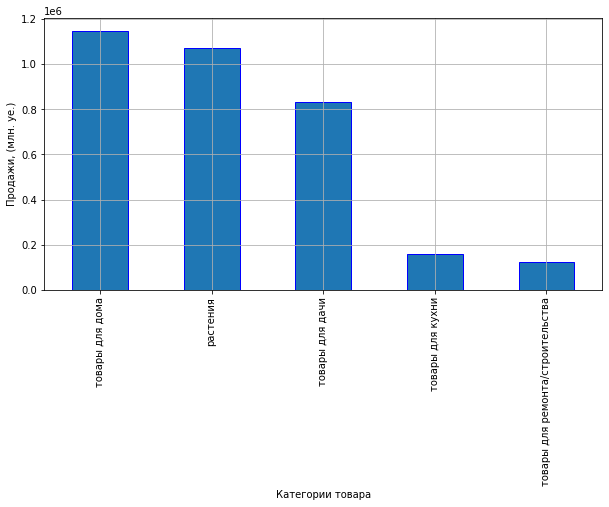

In [41]:
retail_only.groupby('product_category')['total_sales'].sum().sort_values(ascending = False).plot(kind='bar',figsize=(10, 5), grid=True, ec='blue')
plt.ylabel('Продажи, (млн. у.е.)')
plt.xlabel('Категории товара')
plt.show()

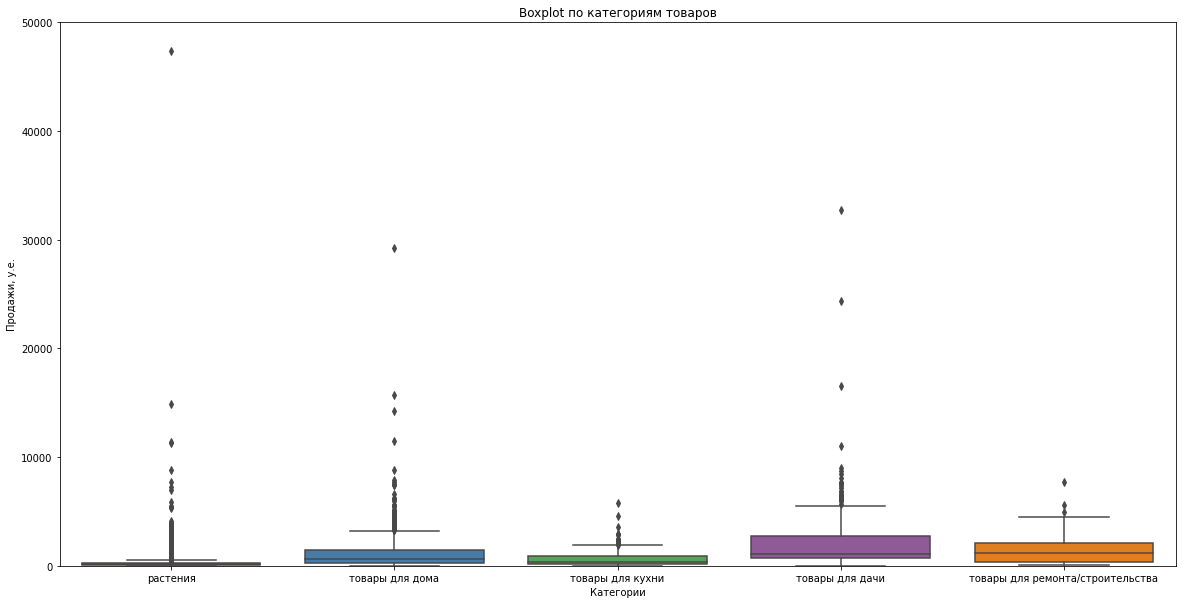

In [42]:
plt.figure(figsize=(20,10)) 
box_genre = sns.boxplot(x="product_category", y="total_sales", data= retail_only, 
                      palette="Set1")
box_genre.set(ylim=(0,50000))
plt.ylabel('Продажи, у.е.')
plt.xlabel('Категории')
plt.title('Boxplot по категориям товаров')
plt.show()

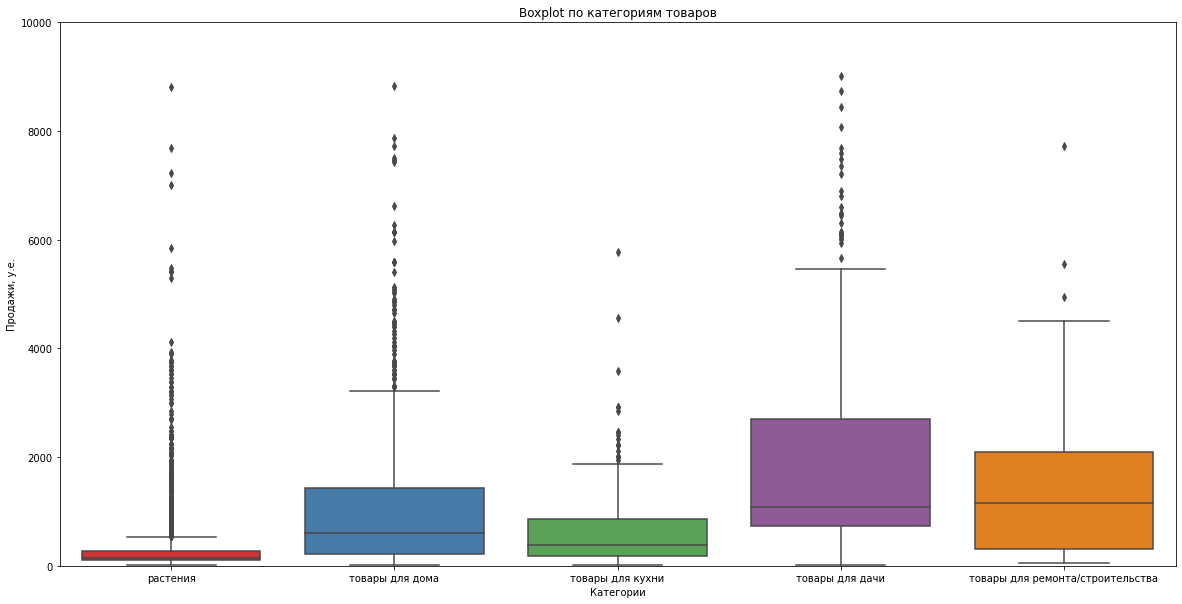

In [43]:
plt.figure(figsize=(20,10))   
box_genre = sns.boxplot(x="product_category", y="total_sales", data= retail_only, 
                      palette="Set1")
box_genre.set(ylim=(0,10000))
plt.ylabel('Продажи, у.е.')
plt.xlabel('Категории')
plt.title('Boxplot по категориям товаров')
plt.show()

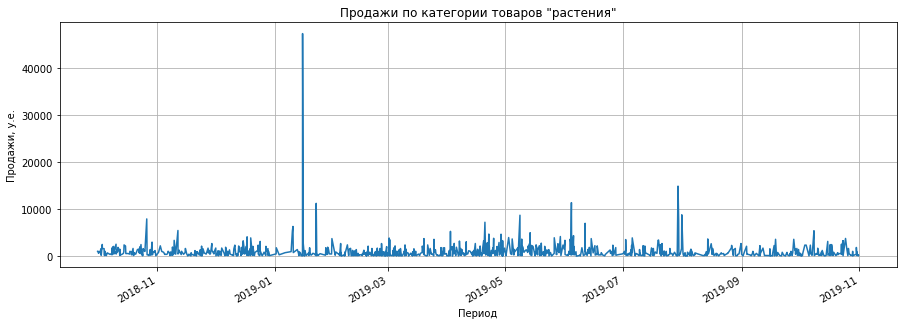

In [44]:
retail_only.query('product_category == "растения"').groupby('date')['total_sales'].sum().sort_values(ascending = False).plot(grid=True, figsize=(15, 5))
plt.title('Продажи по категории товаров "растения"')
plt.ylabel('Продажи, у.е.')
plt.xlabel('Период')
plt.show()

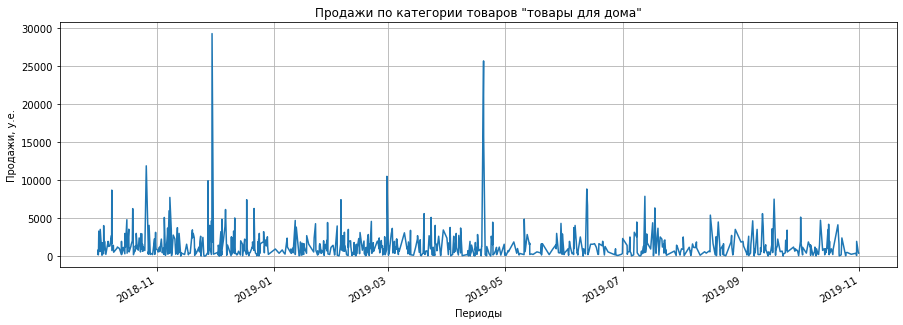

In [45]:
retail_only.query('product_category == "товары для дома"').groupby('date')['total_sales'].sum().sort_values(ascending = False).plot(grid=True, figsize=(15, 5))
plt.title('Продажи по категории товаров "товары для дома"')
plt.ylabel('Продажи, у.е.')
plt.xlabel('Периоды')
plt.show()

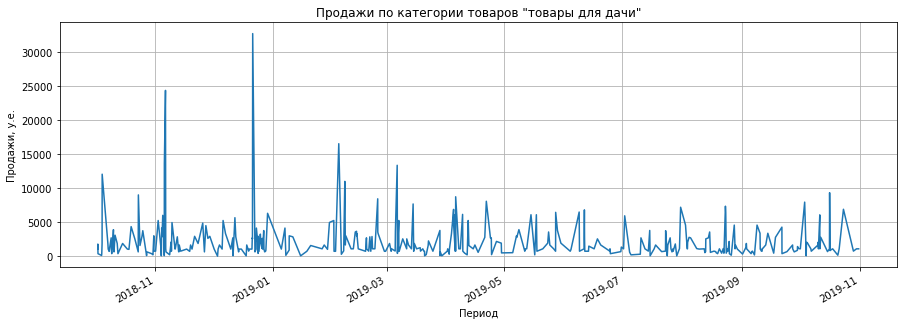

In [46]:
retail_only.query('product_category == "товары для дачи"').groupby('date')['total_sales'].sum().sort_values(ascending = False).plot(grid=True, figsize=(15, 5))
plt.title('Продажи по категории товаров "товары для дачи"')
plt.ylabel('Продажи, у.е.')
plt.xlabel('Период')
plt.show()

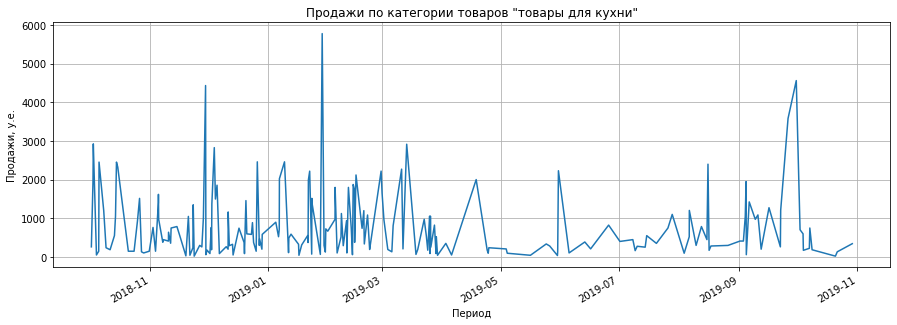

In [47]:
retail_only.query('product_category == "товары для кухни"').groupby('date')['total_sales'].sum().sort_values(ascending = False).plot(grid=True, figsize=(15, 5))
plt.title('Продажи по категории товаров "товары для кухни"')
plt.ylabel('Продажи, у.е.')
plt.xlabel('Период')
plt.show()

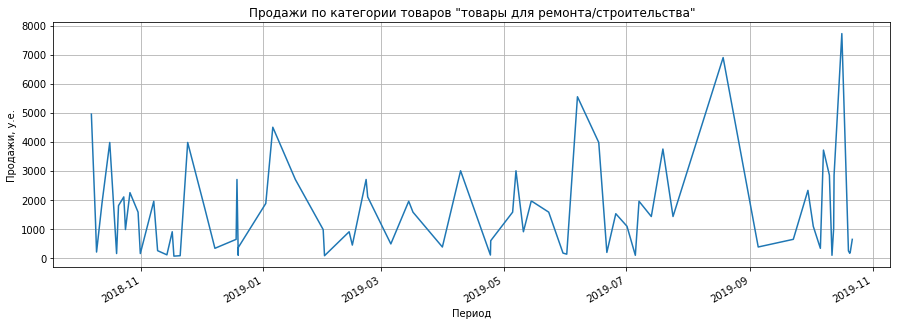

In [48]:
retail_only.query('product_category == "товары для ремонта/строительства"').groupby('date')['total_sales'].sum().sort_values(ascending = False).plot(grid=True, figsize=(15, 5))
plt.title('Продажи по категории товаров "товары для ремонта/строительства"')
plt.ylabel('Продажи, у.е.')
plt.xlabel('Период')
plt.show()

По розничным продажам по сумме продаж лидирует категория товары для дома  ( 1 147 846.0 у.е.), далее растения (1 072 642.0 у.е.), замыкает по сумме  товары для ремонта/строительства (123 567.0). В то же время наблюдаются сильные выбросы по катерии растения, с явным меньшим средним. Далее необходимо просмотреть выбросы и средний чек. 

In [49]:
pivot_avg_price = retail_only.pivot_table(index=['product_category'], values = 'total_sales', aggfunc = ['sum', 'count', 'mean'])
pivot_avg_price.columns = ['Продано всего', 'Количество', 'Средний чек']
pivot_avg_price = pivot_avg_price.sort_values(by = ['Средний чек'], ascending = False)  
pivot_avg_price

,Продано всего,Количество,Средний чек
product_category,,,
товары для дачи,831341.0,413,2012.932203
товары для ремонта/строительства,123567.0,80,1544.587500
товары для дома,1147846.0,1068,1074.762172
товары для кухни,160115.0,243,658.909465
растения,1072642.0,3031,353.890465


Для определения границы, отсекающей аномальные заказы по стоимости, посчитаем 90-й, 95-й и 99-й перцентили.

In [50]:
# Функция определения 90-го, 95-го и 99-го перцентилей
def percentile(df, column):
    perc90 = np.percentile(df[column], 90)
    perc95 = np.percentile(df[column], 95)
    perc99 = np.percentile(df[column], 99)
    print('90-й, 95-й и 99-й перцентили равны: {:.1f}, {:.1f}, {:.1f}.'.format(perc90, perc95, perc99))

In [51]:
print('Показатели стоимости:')
percentile(retail_only, 'total_sales')

Показатели стоимости:
90-й, 95-й и 99-й перцентили равны: 1649.0, 2774.0, 6051.9.


Не более 1% заказов дороже 6 051.9 ден.ед.; не более 5% - дороже 2 774.0 ден.ед. И 10% заказов было совершено на сумму свыше 1 649.0 ден.ед.
Таким образом, свыше 7 000 ден.ед. - это нижняя граница аномальной стоимости заказов

#### Анализ оптовых продаж

In [52]:
#исключаем розницу
wholesale_only = df.query('category_of_buyers != "розница"')
wholesale_only.groupby('product_category')['total_sales'].sum().sort_values(ascending = False)

product_category
товары для дома                     772750.0
товары для ремонта/строительства     13050.0
растения                              5700.0
товары для кухни                      3600.0
Name: total_sales, dtype: float64

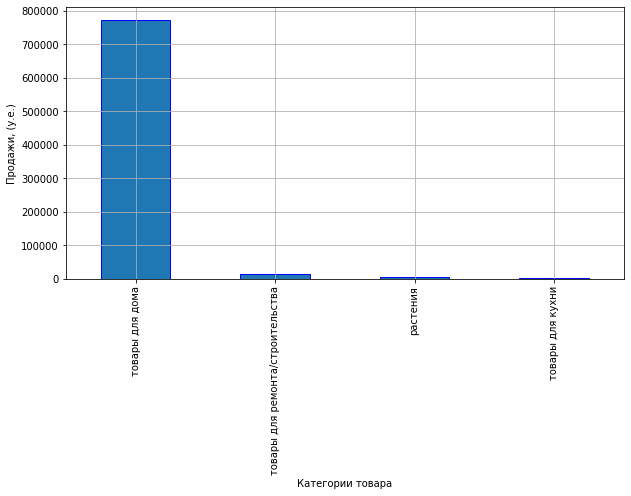

In [53]:
wholesale_only.groupby('product_category')['total_sales'].sum().sort_values(ascending = False).plot(kind='bar',figsize=(10, 5), grid=True, ec='blue')
plt.ylabel('Продажи, (у.е.)')
plt.xlabel('Категории товара')
plt.show()

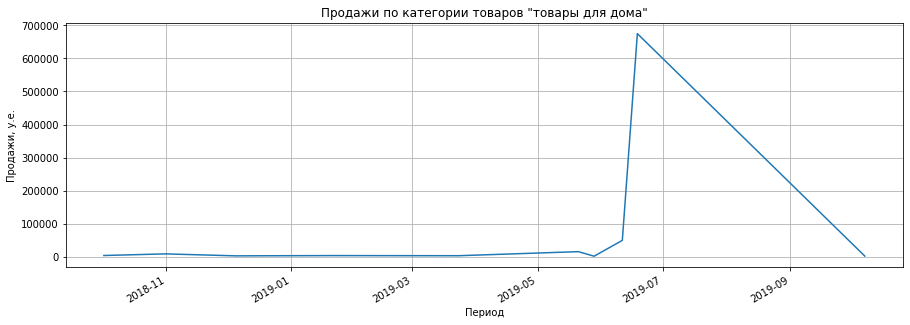

In [54]:
wholesale_only.query('product_category == "товары для дома"').groupby('date')['total_sales'].sum().sort_values(ascending = False).plot(grid=True, figsize=(15, 5))
plt.title('Продажи по категории товаров "товары для дома"')
plt.ylabel('Продажи, у.е.')
plt.xlabel('Период')
plt.show()

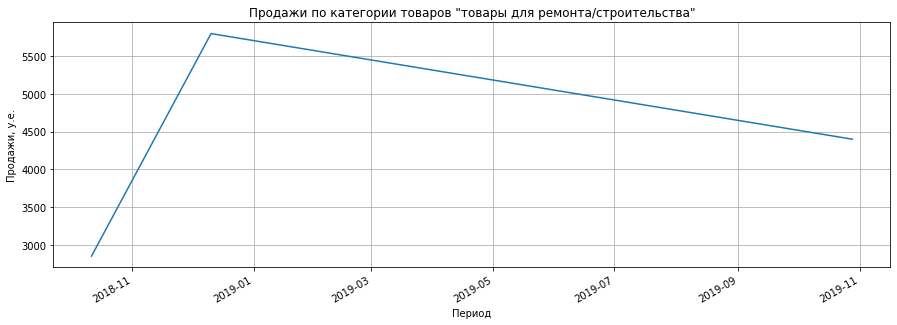

In [55]:
wholesale_only.query('product_category == "товары для ремонта/строительства"').groupby('date')['total_sales'].sum().sort_values(ascending = False).plot(grid=True, figsize=(15, 5))
plt.title('Продажи по категории товаров "товары для ремонта/строительства"')
plt.ylabel('Продажи, у.е.')
plt.xlabel('Период')
plt.show()

In [56]:
wholesale_only.groupby('order_id')['total_sales'].sum().sort_values(ascending = False).head(20)

order_id
71743    675000.0
71668     49432.0
71478     15300.0
68815      8670.0
68611      8550.0
68831      8260.0
69289      5800.0
73110      4400.0
68486      3648.0
72698      3600.0
69893      3400.0
70841      3000.0
69206      2600.0
72885      1900.0
71539      1540.0
Name: total_sales, dtype: float64

In [57]:
wholesale_only.query('order_id == 71743')

,date,customer_id,order_id,product,quantity,price,month,year,category_of_buyers,product_category,total_sales
3819,2019-06-18 15:00:00,312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6,71743,"вантуз с деревянной ручкой d14 см красный, bur...",1000,675.0,6,2019,опт,товары для дома,675000.0


In [58]:
print('Показатели стоимости:')
percentile(wholesale_only, 'total_sales')

Показатели стоимости:
90-й, 95-й и 99-й перцентили равны: 32366.0, 205824.0, 581164.8.


Не более 1% заказов дороже 581 164.8 ден.ед.; не более 5% - дороже 205 824.0 ден.ед. И 10% заказов было совершено на сумму свыше 32 366.0 ден.ед. 

In [59]:
#исключим аномалию с вантузом
pivot_avg_price_wholesale = wholesale_only.query('total_sales < 675000').pivot_table(index=['product_category'], values = 'total_sales', aggfunc = ['sum', 'count', 'mean'])
pivot_avg_price_wholesale.columns = ['Продано всего', 'Количество', 'Средний чек']
pivot_avg_price_wholesale = pivot_avg_price_wholesale.sort_values(by = ['Средний чек'], ascending = False)  
pivot_avg_price_wholesale

,Продано всего,Количество,Средний чек
product_category,,,
товары для дома,97750.0,10,9775.0
растения,5700.0,1,5700.0
товары для ремонта/строительства,13050.0,3,4350.0
товары для кухни,3600.0,1,3600.0


Проанализировав товары по категориям, определила, что  по розничным продажам (по сумме продаж) лидирует категория - товары для дома ( 1 147 846.0 у.е.), далее растения (1 072 642.0 у.е.), замыкает - товары для ремонта/строительства (123 567.0).
При этом средний чек выше всего по категории  товары для дачи и составляет 2 012.93 у.е., далее идет категория - товары для ремонта/строительства	 1 544.58, замыкает  товары по категории - растения	353.89.  

По оптовым продажам наблюдается исключительная аномалия, влияющая на срезний чек и продажи по категориям. Искключив эту аномалию, все равно наблюдаем, что лидирует категория товары для дома с средним чеком - 9 775.0 у.е. Делать выводы по категория  растения и товары для кухни невозможно т.к. наблюдений недостаточно. Но есть возможность улучшить положение и разработать план работы по увеличению объема продаж по напарвлению "опт".

## Статистический анализ данных

Сформулируем гипотезы:

Н0 - Статистически значимых различий в среднем чеке заказа между группами нет.  
Н1 - Статистически значимых различий в в среднем чеке заказа между группами есть.

Пороговое значение alpha примем за 5% (критическое значение для теста, т.е. максимально допускается, что не более чем 5%-ая вероятность ошибки)

In [60]:
#ручное сравнение среднего значение чека
pivot_avg_price

,Продано всего,Количество,Средний чек
product_category,,,
товары для дачи,831341.0,413,2012.932203
товары для ремонта/строительства,123567.0,80,1544.587500
товары для дома,1147846.0,1068,1074.762172
товары для кухни,160115.0,243,658.909465
растения,1072642.0,3031,353.890465


In [61]:
# функция для определения p-value
def test (df, column):
    alpha = .05 # критический уровень статистической значимости
# выделение групп
    plants = retail_only.query('product_category == "растения"')
    house = retail_only.query('product_category == "товары для дома"')
    kitchen = retail_only.query('product_category == "товары для кухни"')
    repair = retail_only.query('product_category == "товары для ремонта/строительства"')
    dacha = retail_only.query('product_category == "товары для дачи"')
#применим функцию st.ttest_ind
    plants_house_results = st.ttest_ind(plants['total_sales'],house['total_sales'])
    plants_kitchen_results = st.ttest_ind(plants['total_sales'],kitchen['total_sales'])
    plants_repair_results = st.ttest_ind(plants['total_sales'],repair['total_sales'])
    plants_dacha_results = st.ttest_ind(plants['total_sales'],dacha['total_sales'])
    house_repair_results = st.ttest_ind(house['total_sales'],repair['total_sales'])
    house_kitchen_results = st.ttest_ind(house['total_sales'],kitchen['total_sales'])
    house_dachan_results = st.ttest_ind(house['total_sales'],dacha['total_sales'])
    dachan_repair_results = st.ttest_ind(dacha['total_sales'],repair['total_sales'])
    dachan_kitchen_results = st.ttest_ind(dacha['total_sales'],kitchen['total_sales'])
    
   
    
    test = pd.DataFrame({'Сравниваемые группы': ['Растения и Товары для дома', 
                                           'Растения и Товары для кухни', 
                                           'Растения и Товары для ремонта/строительства',
                                           'Растения и Товары для дачи',
                                           'Товары для дома и Товары для ремонта/строительства',
                                           'Товары для дома и Товары для кухни', 
                                           'Товары для дома и товары для дачи',
                                           'Товары для дачи и Товары для ремонта/строительства',
                                           'Товары для дачи и Товары для кухни'],
                                'p-value': [plants_house_results.pvalue,
                                           plants_kitchen_results.pvalue,
                                           plants_repair_results.pvalue,
                                           plants_dacha_results.pvalue,
                                           house_repair_results.pvalue,
                                           house_kitchen_results.pvalue,
                                           house_dachan_results.pvalue,
                                           dachan_repair_results.pvalue,
                                           dachan_kitchen_results.pvalue]})
    
    test['p-value'] = round(test['p-value'], 5)
    test = test.set_index('Сравниваемые группы')
    return test


In [62]:
test (retail_only, 'total_sales')

,p-value
Сравниваемые группы,
Растения и Товары для дома,0.00000
Растения и Товары для кухни,0.00003
Растения и Товары для ремонта/строительства,0.00000
Растения и Товары для дачи,0.00000
Товары для дома и Товары для ремонта/строительства,0.01272
Товары для дома и Товары для кухни,0.00011
Товары для дома и товары для дачи,0.00000
Товары для дачи и Товары для ремонта/строительства,0.13482
Товары для дачи и Товары для кухни,0.00000


Значение p-value для среднего чека при разных вариациях сравнений  товарных групп в большинстве близко к нулю, кроме значения p-value для Товары для дачи и Товары для ремонта/строительства (p-value равен 0.13482б, что выше 0,05). Это значит, мы можем отвергнуть нулевую гипотезу и считать, что в среднем чеке есть различия для разных товарных групп, кроме Товары для дачи и Товары для ремонта/строительства. 



Сформулируем гипотезы:

Н0 - Статистически значимых различий в среднем чеке по группам товаров в октябре 2018 и 2019 нет.  
Н1 - Статистически значимых различий в среднем чеке по группам товаров в октябре 2018 и 2019 есть.

Пороговое значение alpha примем за 5% (критическое значение для теста, т.е. максимально допускается, что не более чем 5%-ая вероятность ошибки)

In [63]:
october_by_year = retail_only.query('month == 10')

In [64]:
october_2018_plants = october_by_year.query('product_category == "растения" and year == 2018')
october_2018_house = october_by_year.query('product_category == "товары для дома" and year == 2018')
october_2018_kitchen = october_by_year.query('product_category == "товары для кухни" and year == 2018')
october_2018_repair = october_by_year.query('product_category == "товары для ремонта/строительства" and year == 2018')
october_2018_dacha = october_by_year.query('product_category == "товары для дачи" and year == 2018')
october_2019_plants = october_by_year.query('product_category == "растения" and year == 2019')
october_2019_house = october_by_year.query('product_category == "товары для дома" and year == 2019')
october_2019_kitchen = october_by_year.query('product_category == "товары для кухни" and year == 2019')
october_2019_repair = october_by_year.query('product_category == "товары для ремонта/строительства" and year == 2019')
october_2019_dacha = october_by_year.query('product_category == "товары для дачи" and year == 2019') 

In [65]:
alpha = .05 # критический уровень статистической значимости
plants_year = st.ttest_ind(october_2018_plants['total_sales'],october_2019_plants['total_sales'])

print('Сравниваемые группы товаров Растения в октябре 2018 и октябре 2019')
print('p-значение:', plants_year.pvalue)

if (plants_year.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

print('------------------------------------------------')
   
kitchen_year = st.ttest_ind(october_2018_kitchen['total_sales'],october_2019_kitchen['total_sales'])
   
print('Сравниваемые группы товаров Товары для кухни в октябре 2018 и октябре 2019')
print('p-значение:', kitchen_year.pvalue)

if (kitchen_year.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
print('------------------------------------------------')

  
repair_year = st.ttest_ind(october_2018_repair['total_sales'],october_2019_repair['total_sales'])
   
print('Сравниваемые группы товаров Товары для ремонта/строительства в октябре 2018 и октябре 2019')
print('p-значение:', repair_year.pvalue)

if (repair_year.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
print('------------------------------------------------')

house_year = st.ttest_ind(october_2018_house['total_sales'],october_2019_house['total_sales'])

print('Сравниваемые группы товаров Товары для дома в октябре 2018 и октябре 2019')
print('p-значение:', house_year.pvalue)

if (house_year.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
print('------------------------------------------------')

dacha_year = st.ttest_ind(october_2018_dacha['total_sales'],october_2019_dacha['total_sales'])

print('Сравниваемые группы товаров Товары для дачи в октябре 2018 и октябре 2019')
print('p-значение:', dacha_year.pvalue)

if (dacha_year.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Сравниваемые группы товаров Растения в октябре 2018 и октябре 2019
p-значение: 0.0010375432159034372
Отвергаем нулевую гипотезу
------------------------------------------------
Сравниваемые группы товаров Товары для кухни в октябре 2018 и октябре 2019
p-значение: 0.34335255057605585
Не получилось отвергнуть нулевую гипотезу
------------------------------------------------
Сравниваемые группы товаров Товары для ремонта/строительства в октябре 2018 и октябре 2019
p-значение: 0.6531192834042955
Не получилось отвергнуть нулевую гипотезу
------------------------------------------------
Сравниваемые группы товаров Товары для дома в октябре 2018 и октябре 2019
p-значение: 0.1271588178374512
Не получилось отвергнуть нулевую гипотезу
------------------------------------------------
Сравниваемые группы товаров Товары для дачи в октябре 2018 и октябре 2019
p-значение: 0.5771823359872599
Не получилось отвергнуть нулевую гипотезу


Значение p-value для среднего чека по группам товаров в октябре 2018 и октябре 2019 в большинстве случаев выше 0,05. Это значит, мы не можем отвергнуть нулевую гипотезу и считать, что статистически значимых различий в среднем чеке по группам товаров в октябре 2018 и 2019 нет.


## Вывод 

Была проанализирована выгрузка ассортимента интернет-магазина товаров для дома и быта "Пока все тут".  
Данные для анализа состояли из 6737 строк и 6 столбцов за период с 2018-10-01 по 2019-10-31. Всего по идентификатору покупателей: 2 451, всего товаров: 2 341 шт. Количество заказов - 2 784. Всего за период продано на:  4 130 611.0 у.е., в том числе за 2018 продано на: 1 067 774.0 у.е., а  в за 2019  на-  3 062 837.0 у.е.
На этапе подготовки данных пропущенных значений и полных дубликатов найдено не было, но были выявлены скрытые дубликаты (в размере 1886). Так как в выгрузке отстутвует статус заказов, то пердположить, что это изменение статуса заказа затруднительно и было принято решение исключить их из анализа.  
Дополнительно, для удобства анализа товарам была определена категория: 

- 'растения',  
- 'товары для дачи',  
- 'товары для дома',  
- 'товары для кухни',  
- 'товары для ремонта/строительства'.  

Так в категорию  'растения' были отнесенты товары типа - рассада, семена, домашние цветы и проч. К категории 'товары для дачи' были отнесены - автополив, удобрения, тележки и проч. К категории 'товары для дома' - постельное белье, ванные пренадлежности, средства для чистки и проч. К 'товары для кухни' - посуда, столовые принадлежности и проч. К 'товары для ремонта/строительства' - инструменты, приборы, детали и проч.  

Также было принято решение разделить клиентов на розничные продажи - "розница" (до 70 единиц товара в заказе)  и оптовые продажи - "опт" (более 70 единиц товара в заказе). Так сумма розничных продаж составляет: 3 335 511.0 у.е., а оптовых продаж - 795 100.0 у.е.
Явно преобладает в магазине розница, но для развития и увеличения продаж стоит рассмотреть и развивать напарвление оптовых продаж. 
    
В розничных продажах по категориям, определено, по количеству больше всего продано  из категории растения (3 031 позиций на сумму 1 072 642 у.е.),  в то же время средний чек ниже всего - 353.89 у.е. Видим, что средний чек выше всего в категории - товары для дачи - 2 012.93 у.е., а всего продано на 831 341.0 у.е. Т.е. категории товаров можно разделить на товары с высокой, средней и низкой доходностью. Так товары для дачи и товары для ремонта/строительства - товары с высокой доходностью, товары для дома - товары с средней доходностью, товары для кухни и растения - товары с низкой дохоностью.  

По оптовы продажам по категориям недостаточно наблюдений, данное напарвление преставлено  крайне мало. Сумма оптовых продаж составляет: 795 100.0 у.е., это 19% от общих продаж, при этом количество по категорим было минимальное. По оптовым продажам наблюдается исключительная аномалия, влияющая на срезний чек и продажи по категориям. Искключив эту аномалию, все равно наблюдаем, что лидирует категория товары для дома с средним чеком - 9 775.0 у.е.
 
В рамках исследования был проведн статистический анализ данных, были сформулируем гипотезы:

Н0 - Статистически значимых различий в среднем чеке заказа между группами нет.  
Н1 - Статистически значимых различий в в среднем чеке заказа между группами есть.
Было определно, что значение p-value для среднего чека при разных вариациях сравнений товарных групп (по розничным продажам) в большинстве близко к нулю, кроме значения p-value для Товары для дачи и Товары для ремонта/строительства (p-value равен 0.13482б, что выше 0,05). Это значит, мы можем отвергнуть нулевую гипотезу и считать, что в среднем чеке есть различия для разных товарных групп, кроме Товары для дачи и Товары для ремонта/строительства.

Сформулируем гипотезы:  
Н0 - Статистически значимых различий в среднем чеке по группам товаров в октябре 2018 и 2019 нет.  
Н1 - Статистически значимых различий в среднем чеке по группам товаров в октябре 2018 и 2019 есть.  
Значение p-value для среднего чека по группам товаров в октябре 2018 и октябре 2019 в большинстве случаев выше 0,05. Это значит, мы не можем отвергнуть нулевую гипотезу и считать, что статистически значимых различий в среднем чеке по группам товаров в октябре 2018 и 2019 нет.


## Рекомендации 

По результатам анализа рекомендации:  
- Считаю, что делить товары на основные и дополнительные не совсем целесообразно. Предлагаю рассмотреть возможность определния для клиента Целевой категории (основной запрос, потребность), а к целевой категории предлагать подбора рекомендуемых дополнительных товаров из вспомогательной категории. Т.е. одна категория может быть дополнительной для другой. Например, 
если клиент рассмтривает товар из категории 'растения', то дополнительным для него могут быть товары для дачи ( садовые инструменты, горшки для рассады, грунт для рассады). Так мы можем отталкиваться от основного запроса - целевой категории - 'растения' и предлагать товары из вспомогательной категории - 'товары для дачи'. Появляется перспектива "миксовать", "разбавляя" заказ с товарами низкой доходности, товарами с высокой доходности.  
- Развите напарвленения оптовых продаж. Рассмотреть возможность доп. бонусов/скидочной системы по категория с высокой доходностью.  
-Ориентрироваться на платёжеспособности покупателя (если он не интересуется дорогими товарами), предлагать ему товары с меньшей доходностью к товарам, которые он покупает, в рамках той же категории.

 





